

```
# NOTE: Time complexity is high, as the dataset is huge and taking time in text preprocessing and model trainning.
```



## In this project you will be working on two different datasets in which one dataset contains news headlines with unlabeled sentiments. And another dataset contains labeled tweets from the twitter data. 

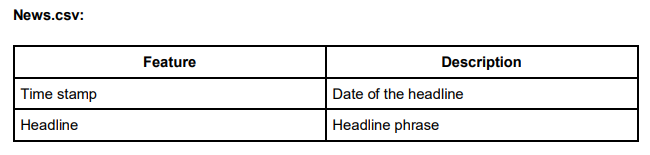

## Tasks To be Performed:
* Transform the Text data to be processed for Sentiment Analysis
* Generate Sentiments for unlabeled news headlines data. 
* Evaluate the sentiment analysis models based on accuracy.

In [1]:
# importing the required libraries
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#Feature Generation Using Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

#tf-idf 
from sklearn.feature_extraction.text import TfidfVectorizer

# to predict the sentiment of the headlines
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

# LabelEncoder
from sklearn.preprocessing import LabelEncoder

#splitting in training and testing data
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

#model Building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
nltk.download('vader_lexicon')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
news = pd.read_csv("/content/drive/MyDrive/Datasets/news.csv")
news.head(10)

,publish_date,headline
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
5,20030219,ambitious olsson wins triple jump
6,20030219,antic delighted with record breaking barca
7,20030219,aussie qualifier stosur wastes four memphis match
8,20030219,aust addresses un security council over iraq
9,20030219,australia is locked into war timetable opp


In [4]:
news.shape

(1048575, 2)

In [5]:
sentiment = SentimentIntensityAnalyzer()

In [6]:
def vadar_sentiment(text):
    """ Calculate and return the nltk vadar (lexicon method) sentiment """
    return sentiment.polarity_scores(text)['compound']

# create new column for vadar compound sentiment score
news['vadar compound'] = news['headline'].apply(vadar_sentiment)

news.head(10)

,publish_date,headline,vadar compound
0,20030219,aba decides against community broadcasting lic...,0.0000
1,20030219,act fire witnesses must be aware of defamation,-0.3400
2,20030219,a g calls for infrastructure protection summit,0.0000
3,20030219,air nz staff in aust strike for pay rise,-0.2263
4,20030219,air nz strike to affect australian travellers,-0.1280
5,20030219,ambitious olsson wins triple jump,0.7783
6,20030219,antic delighted with record breaking barca,0.5106
7,20030219,aussie qualifier stosur wastes four memphis match,0.0000
8,20030219,aust addresses un security council over iraq,0.3400
9,20030219,australia is locked into war timetable opp,-0.5994


In [7]:
def categorise_sentiment(sentiment, neg_threshold=-0.05, pos_threshold=0.05):
    """ categorise the sentiment value as positive (1), negative (-1) 
        or neutral (0) based on given thresholds """
    if sentiment < neg_threshold:
        label = 'Negative'
    elif sentiment > pos_threshold:
        label = 'Positive'
    else:
        label = 'Neutral'
    return label

# new col with vadar sentiment label based on vadar compound score
news['sentiment'] = news['vadar compound'].apply(categorise_sentiment)

news.head(10)

,publish_date,headline,vadar compound,sentiment
0,20030219,aba decides against community broadcasting lic...,0.0000,Neutral
1,20030219,act fire witnesses must be aware of defamation,-0.3400,Negative
2,20030219,a g calls for infrastructure protection summit,0.0000,Neutral
3,20030219,air nz staff in aust strike for pay rise,-0.2263,Negative
4,20030219,air nz strike to affect australian travellers,-0.1280,Negative
5,20030219,ambitious olsson wins triple jump,0.7783,Positive
6,20030219,antic delighted with record breaking barca,0.5106,Positive
7,20030219,aussie qualifier stosur wastes four memphis match,0.0000,Neutral
8,20030219,aust addresses un security council over iraq,0.3400,Positive
9,20030219,australia is locked into war timetable opp,-0.5994,Negative


In [8]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   publish_date    1048575 non-null  int64  
 1   headline        1048575 non-null  object 
 2   vadar compound  1048575 non-null  float64
 3   sentiment       1048575 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 32.0+ MB


In [9]:
news.isna().sum()

publish_date      0
headline          0
vadar compound    0
sentiment         0
dtype: int64

In [10]:
# required functions for the word preprocessing steps

# for lowering the sentences
def lowercase_text(text):
    return text.lower()


def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))


def tokenize_text(text):
    return nltk.word_tokenize(text)


def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    filtered_text = [word for word in text if word.lower() not in stop_words]
    return filtered_text

In [11]:
news['final_text'] = news.headline.apply(lowercase_text).apply(remove_punctuation).apply(tokenize_text).apply(remove_stopwords)

news.head(20)

,publish_date,headline,vadar compound,sentiment,final_text
0,20030219,aba decides against community broadcasting lic...,0.0000,Neutral,"[aba, decides, community, broadcasting, licence]"
1,20030219,act fire witnesses must be aware of defamation,-0.3400,Negative,"[act, fire, witnesses, must, aware, defamation]"
2,20030219,a g calls for infrastructure protection summit,0.0000,Neutral,"[g, calls, infrastructure, protection, summit]"
3,20030219,air nz staff in aust strike for pay rise,-0.2263,Negative,"[air, nz, staff, aust, strike, pay, rise]"
4,20030219,air nz strike to affect australian travellers,-0.1280,Negative,"[air, nz, strike, affect, australian, travellers]"
5,20030219,ambitious olsson wins triple jump,0.7783,Positive,"[ambitious, olsson, wins, triple, jump]"
6,20030219,antic delighted with record breaking barca,0.5106,Positive,"[antic, delighted, record, breaking, barca]"
7,20030219,aussie qualifier stosur wastes four memphis match,0.0000,Neutral,"[aussie, qualifier, stosur, wastes, four, memp..."
8,20030219,aust addresses un security council over iraq,0.3400,Positive,"[aust, addresses, un, security, council, iraq]"
9,20030219,australia is locked into war timetable opp,-0.5994,Negative,"[australia, locked, war, timetable, opp]"


In [12]:
news = news.reset_index()

In [13]:
news.sample(10)

,index,publish_date,headline,vadar compound,sentiment,final_text
1026658,1026658,20160516,teen charged over mini motorbike death to rema...,-0.6908,Negative,"[teen, charged, mini, motorbike, death, remain..."
51956,51956,20031029,red tape increases small business costs survey,0.0000,Neutral,"[red, tape, increases, small, business, costs,..."
38633,38633,20030824,howard meets former ny mayor,0.0000,Neutral,"[howard, meets, former, ny, mayor]"
783182,783182,20130501,new equipment for the start of the northern,0.0000,Neutral,"[new, equipment, start, northern]"
686300,686300,20120410,seoul warns north may conduct nuclear test,-0.1027,Negative,"[seoul, warns, north, may, conduct, nuclear, t..."
263788,263788,20061015,aust govt welcomes north korea sanctions,0.4019,Positive,"[aust, govt, welcomes, north, korea, sanctions]"
252623,252623,20060730,roosters maintain dominance of cowboys,0.2023,Positive,"[roosters, maintain, dominance, cowboys]"
233139,233139,20060427,crows full of run despite heavy schedule,0.0000,Neutral,"[crows, full, run, despite, heavy, schedule]"
971796,971796,20150813,mandageria fairfaxi becomes official nsw fossi...,0.0000,Neutral,"[mandageria, fairfaxi, becomes, official, nsw,..."
199666,199666,20051109,transport issues surface in council performance,0.0000,Neutral,"[transport, issues, surface, council, performa..."


In [14]:
# converting the list of words into the sentences from the 'final_text' columns 

for i in range(len(news)):
  news['final_text'][i] = " ".join(news['final_text'][i])

<ipython-input-14-c5cb84f3b83a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['final_text'][i] = " ".join(news['final_text'][i])


In [15]:
news.head()

,index,publish_date,headline,vadar compound,sentiment,final_text
0,0,20030219,aba decides against community broadcasting lic...,0.0000,Neutral,aba decides community broadcasting licence
1,1,20030219,act fire witnesses must be aware of defamation,-0.3400,Negative,act fire witnesses must aware defamation
2,2,20030219,a g calls for infrastructure protection summit,0.0000,Neutral,g calls infrastructure protection summit
3,3,20030219,air nz staff in aust strike for pay rise,-0.2263,Negative,air nz staff aust strike pay rise
4,4,20030219,air nz strike to affect australian travellers,-0.1280,Negative,air nz strike affect australian travellers


In [16]:
# encoding the target column

le = LabelEncoder()
news['sentiment'] = le.fit_transform(news['sentiment'])

In [17]:
le.classes_

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [18]:
# generating feature using BAG OF WORDS

cv = CountVectorizer(ngram_range = (1,1))
num_of_text = cv.fit_transform(news['final_text'])

In [19]:
#splitting in training and testing data without performing Tf-Idf
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(num_of_text, news['sentiment'], test_size = 0.2, random_state=0)

In [20]:
#model Building Decision Tree

classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

#predictions 
pred = classifier.predict(X_test)

print(classification_report(y_test, pred))
print("\n\nAccuracy Score with RandomForestClassifier: ",accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     71723
           1       0.98      0.98      0.98     95067
           2       0.94      0.94      0.94     42925

    accuracy                           0.96    209715
   macro avg       0.96      0.96      0.96    209715
weighted avg       0.96      0.96      0.96    209715



Accuracy Score with RandomForestClassifier:  0.9637841832963784
